<a href="https://colab.research.google.com/github/VEDANTPARAB404/SY-SKILL/blob/main/Skill4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

CO RELATION AND VARIANCE THRESHOLD

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [5]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
df = pd.DataFrame(data=housing.data, columns=housing.feature_names)
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


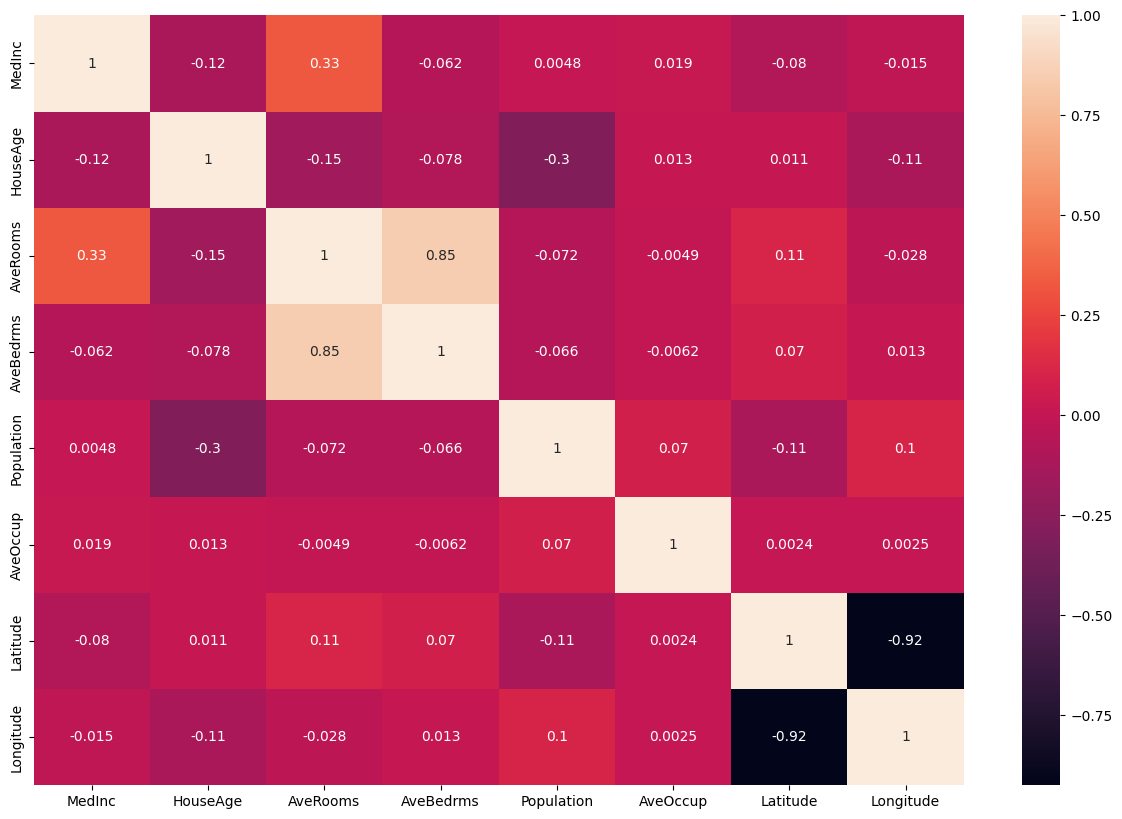

In [7]:
corrmat = df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corrmat, annot=True)
plt.show()

In [8]:
from sklearn.feature_selection import VarianceThreshold
df["MyNewCol"]=100

VarThresh= VarianceThreshold(threshold=50)
VarThresh.fit(df)
VarThresh.get_support()

array([False,  True, False, False,  True,  True, False, False, False])

CHI SQUARE AND ANOVA

In [14]:
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import SelectPercentile
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_classif

iris = load_iris()
X = iris.data
y = iris.target

chi2_selector = SelectKBest(chi2, k=2)
kBest = chi2_selector.fit_transform(X, y)

chi2_scores = pd.DataFrame(list(zip(iris.feature_names,chi2_selector.scores_)),columns=['feature','score'])
chi2_scores

print("Number of original features: ", X.shape[1])
print("Number of reduced features: ", kBest.shape[1])

Number of original features:  4
Number of reduced features:  2


In [15]:
from sklearn.feature_selection import mutual_info_classif
import numpy as np


information_gain = mutual_info_classif(X, y)


feature_importance = pd.DataFrame({'Feature': iris.feature_names, 'Information Gain': information_gain})

feature_importance = feature_importance.sort_values('Information Gain', ascending=False)

feature_importance


,Feature,Information Gain
3,petal width (cm),0.992940
2,petal length (cm),0.989982
0,sepal length (cm),0.502917
1,sepal width (cm),0.231647
